In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow

In [14]:
data=pd.read_csv('tips (data for regression problem).csv')

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [17]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [20]:
data = remove_outliers(data, 'total_bill')
data = remove_outliers(data, 'tip')

In [22]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


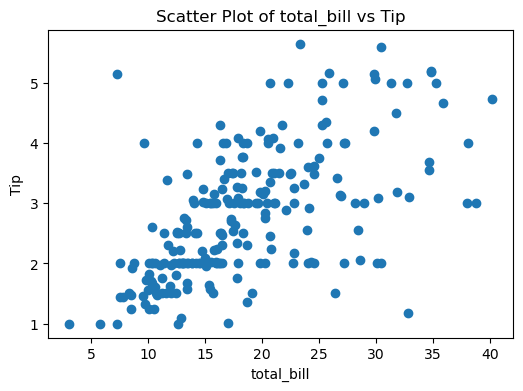

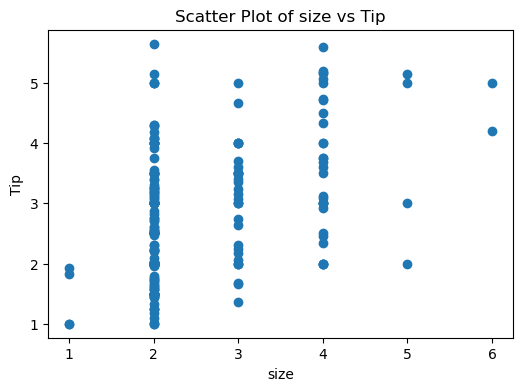

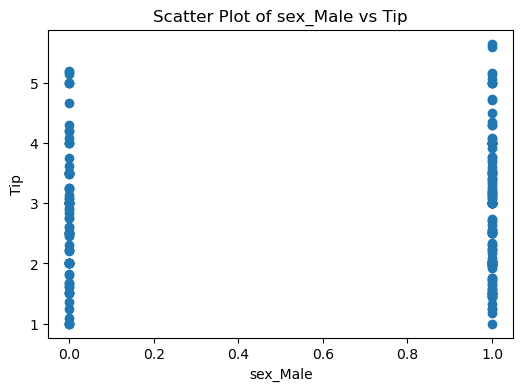

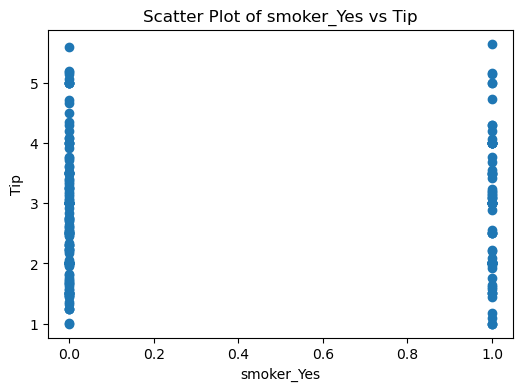

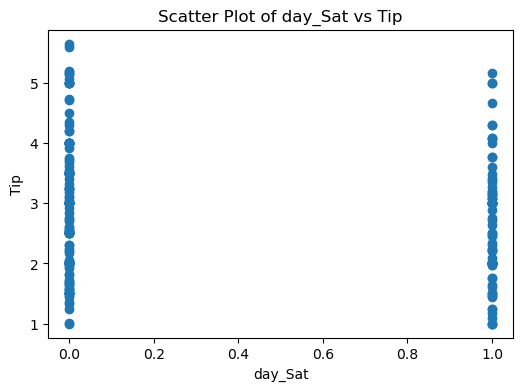

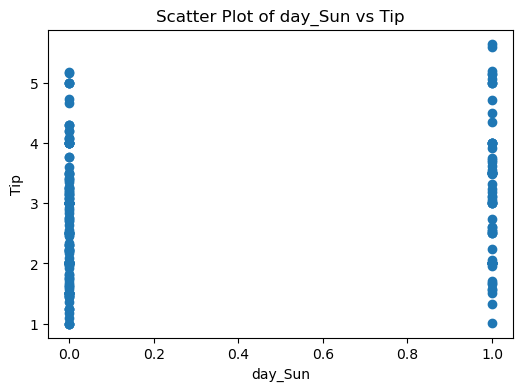

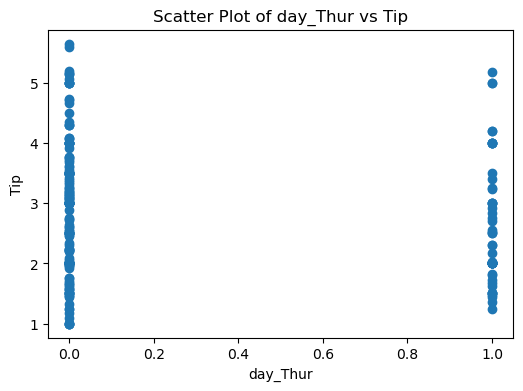

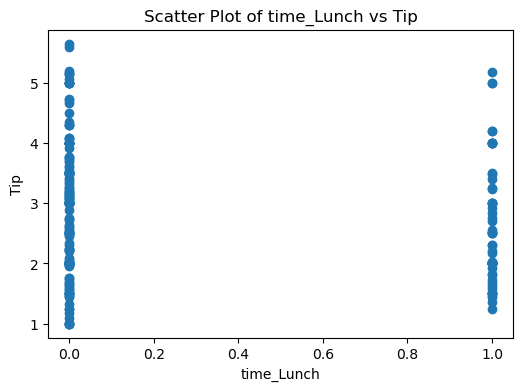

In [59]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[column], data['tip'])
    plt.xlabel(column)
    plt.ylabel("Tip")
    plt.title(f'Scatter Plot of {column} vs Tip')
    plt.show()


/Users/riya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


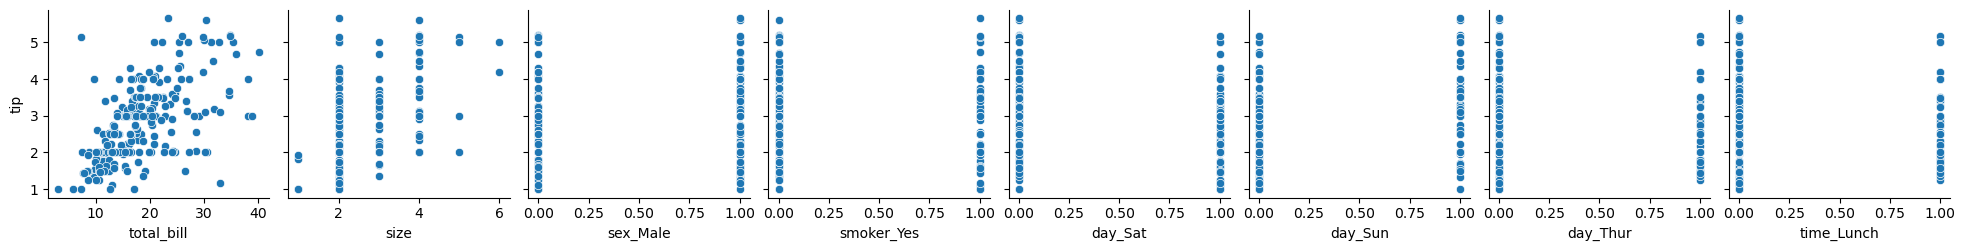

<Figure size 600x400 with 0 Axes>

In [66]:
sns.pairplot(data, y_vars='tip', x_vars=X.columns, kind='scatter', height=2.5)
plt.figure(figsize=(6, 4))
plt.suptitle("Pair Plot of Predictors vs Tip", y=2)
plt.show()

In [76]:
X_with_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     8.967
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.63e-09
Time:                        21:07:07   Log-Likelihood:                -144.68
No. Observations:                 114   AIC:                             307.4
Df Residuals:                     105   BIC:                             332.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9347      0.084     34.932      0.0

In [26]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [28]:
X = data.drop("tip", axis=1)
y = data["tip"] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
print(f"Rainbow Test: Statistic={rainbow_stat:.3f}, p-value={rainbow_p_val:.3f}")
if rainbow_p_val < 0.05:
    print("Linearity assumption may not hold (p < 0.05). Non-linear models might be more suitable.")
else:
    print("Linearity assumption holds (p >= 0.05). Linear models are appropriate.")


Rainbow Test: Statistic=1.408, p-value=0.112
Linearity assumption holds (p >= 0.05). Linear models are appropriate.


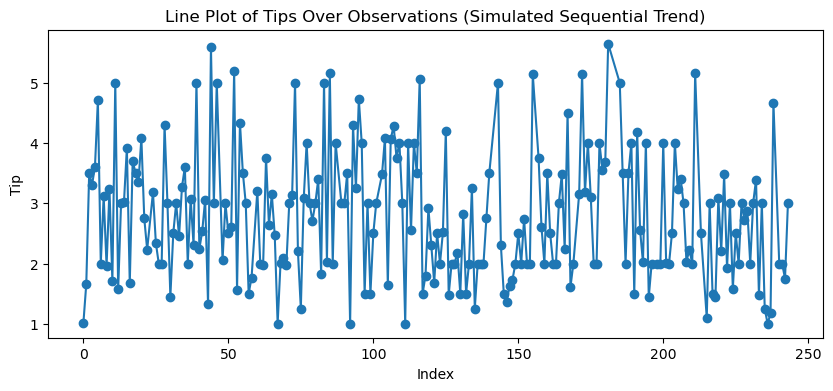

In [72]:
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['tip'], marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Tip")
plt.title("Line Plot of Tips Over Observations (Simulated Sequential Trend)")
plt.show()


In [31]:
correlation = data.corr()
print("Correlation with 'tip':\n", correlation['tip'].sort_values(ascending=False))


Correlation with 'tip':
 tip           1.000000
total_bill    0.602324
size          0.429042
day_Sun       0.222859
smoker_Yes    0.022180
sex_Male      0.017912
day_Sat      -0.097125
day_Thur     -0.120074
time_Lunch   -0.144555
Name: tip, dtype: float64


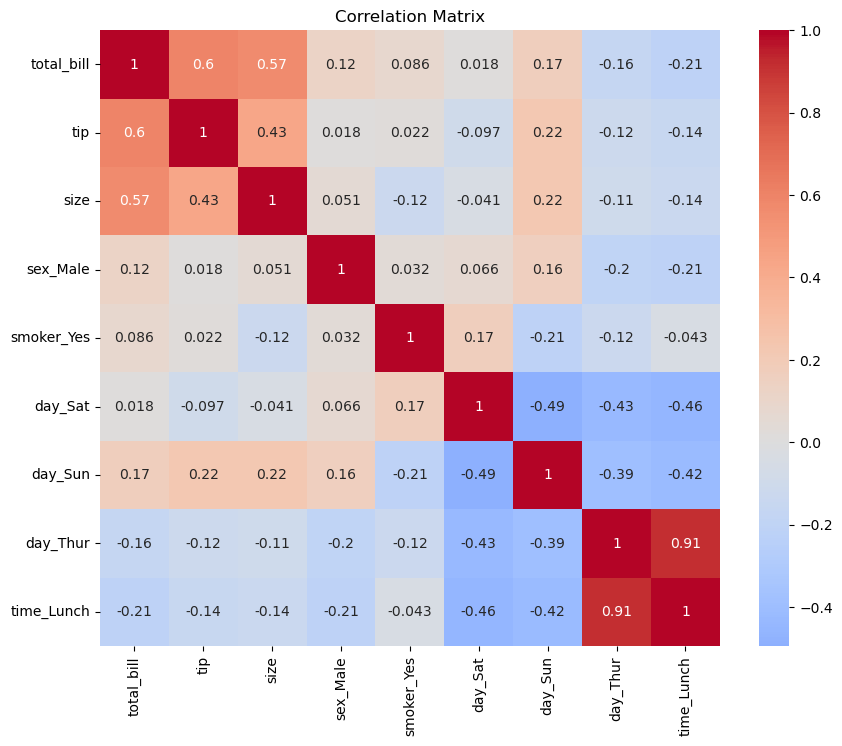

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importances:\n", feature_importance.sort_values(ascending=False))



Feature Importances:
 total_bill    0.755595
size          0.058830
day_Sun       0.046196
day_Sat       0.040544
smoker_Yes    0.040429
sex_Male      0.030151
day_Thur      0.016178
time_Lunch    0.012078
dtype: float64


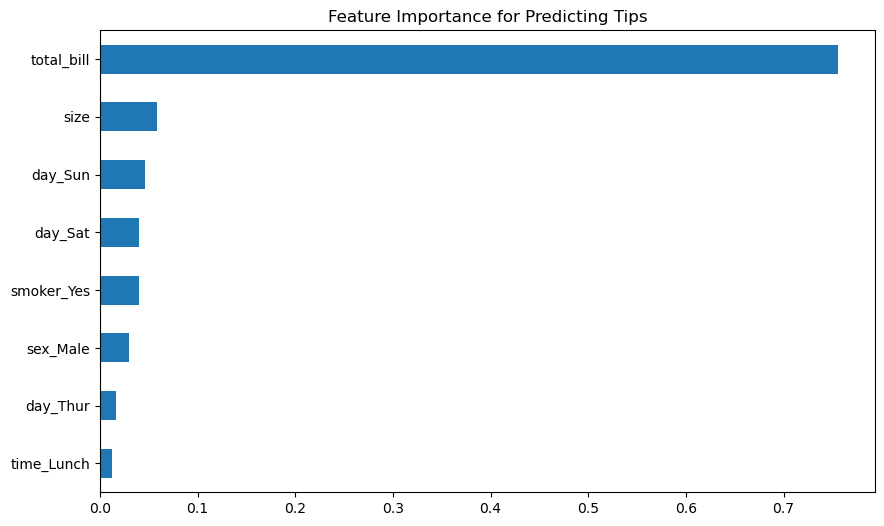

In [55]:
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance for Predicting Tips')
plt.show()




In [35]:
model_performance = {}


In [36]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [37]:
model_performance['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}
model_performance['Linear Regression']

{'MSE': 0.6904829158810023, 'R2': 0.2998278567573778}

In [38]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [39]:
model_performance['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}
model_performance['Ridge Regression']

{'MSE': 0.6900759155101832, 'R2': 0.3002405683761342}

In [40]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [41]:
model_performance['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}
model_performance['Lasso Regression']

{'MSE': 0.7002680929381713, 'R2': 0.28990536883689855}

In [42]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [43]:
model_performance['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}
model_performance['Decision Tree Regression']

{'MSE': 1.2228219298245617, 'R2': -0.23998122432459668}

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [45]:
model_performance['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}
model_performance['Random Forest Regression']

{'MSE': 0.7970720675438597, 'R2': 0.1917429888342188}

In [46]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [47]:
model_performance['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}
model_performance['Support Vector Regression']

{'MSE': 0.7142709599591582, 'R2': 0.2757060060603175}

In [48]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [49]:
model_performance['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}
model_performance['K-Nearest Neighbors Regression']

{'MSE': 0.7933985263157896, 'R2': 0.1954680791670712}

In [50]:
model_performance

{'Linear Regression': {'MSE': 0.6904829158810023, 'R2': 0.2998278567573778},
 'Ridge Regression': {'MSE': 0.6900759155101832, 'R2': 0.3002405683761342},
 'Lasso Regression': {'MSE': 0.7002680929381713, 'R2': 0.28990536883689855},
 'Decision Tree Regression': {'MSE': 1.2228219298245617,
  'R2': -0.23998122432459668},
 'Random Forest Regression': {'MSE': 0.7970720675438597,
  'R2': 0.1917429888342188},
 'Support Vector Regression': {'MSE': 0.7142709599591582,
  'R2': 0.2757060060603175},
 'K-Nearest Neighbors Regression': {'MSE': 0.7933985263157896,
  'R2': 0.1954680791670712}}

In [57]:
print("\nManagement Insights:")
top_factors = feature_importance.sort_values(ascending=False).head(3)
for factor, importance in top_factors.items():
    print(f"- '{factor}' has a high impact on tip amount (Importance: {importance:.2f}).")



Management Insights:
- 'total_bill' has a high impact on tip amount (Importance: 0.76).
- 'size' has a high impact on tip amount (Importance: 0.06).
- 'day_Sun' has a high impact on tip amount (Importance: 0.05).


In [58]:
if 'size' in top_factors.index:
    print("- Increasing party size could positively impact tips.")
if 'total_bill' in top_factors.index:
    print("- Larger bills may correlate with higher tips, suggesting upselling opportunities.")
if 'day_Sun' in top_factors.index or 'time_Dinner' in top_factors.index:
    print("- Encourage customer visits during high-tip days/times for better revenue.")

- Increasing party size could positively impact tips.
- Larger bills may correlate with higher tips, suggesting upselling opportunities.
- Encourage customer visits during high-tip days/times for better revenue.


In [53]:
best_model = max(model_performance, key=lambda x: model_performance[x]['R2'])
print(f"Best Model: {best_model} with R2: {model_performance[best_model]['R2']}")


Best Model: Ridge Regression with R2: 0.3002405683761342


In [79]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals of {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

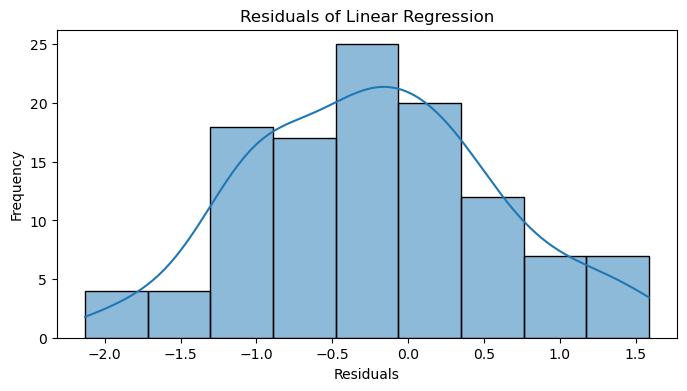

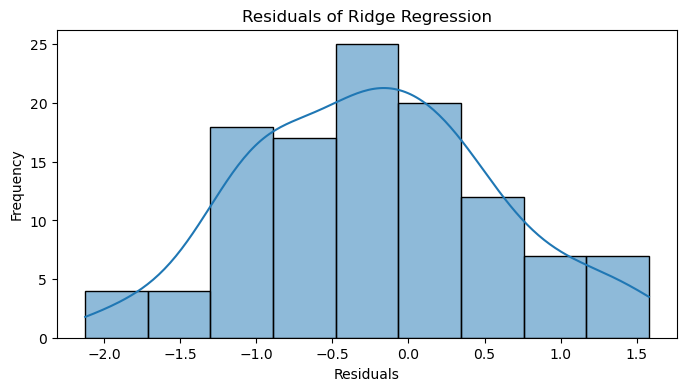

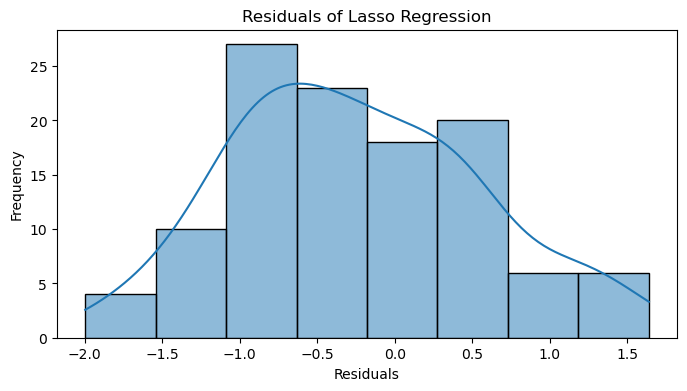

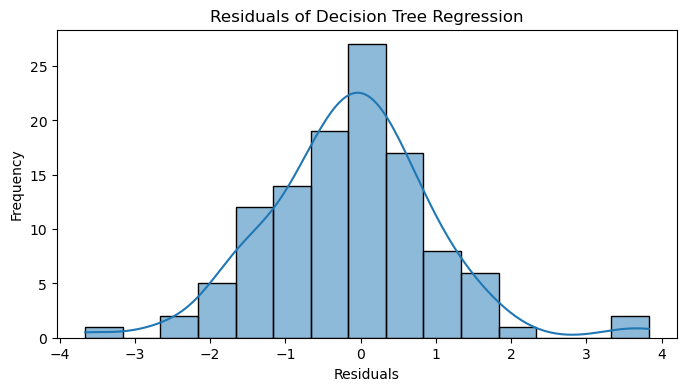

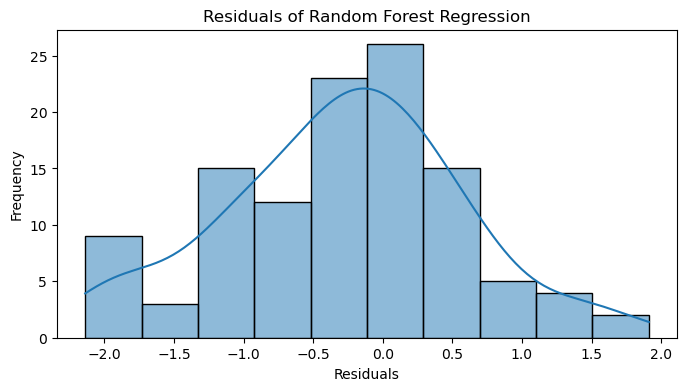

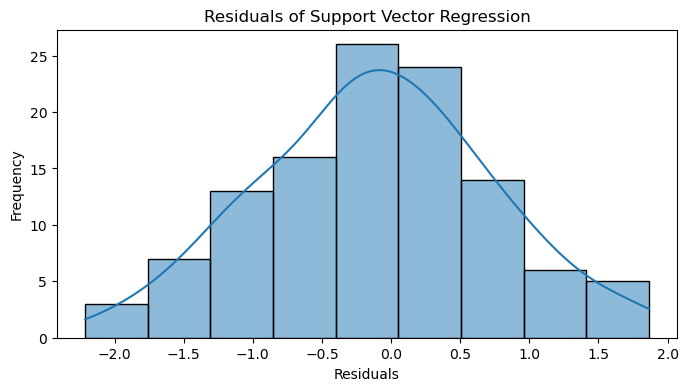

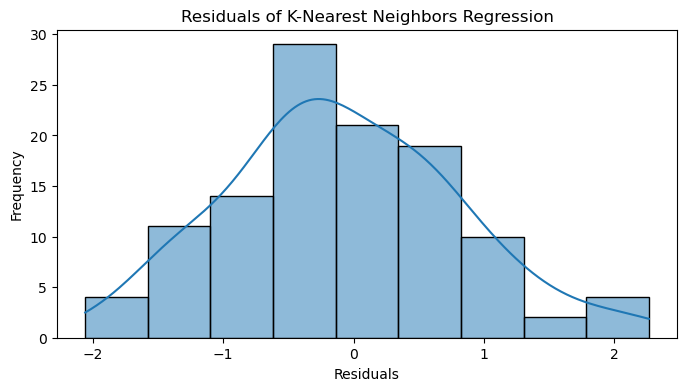

In [80]:
plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")
plot_residuals(y_test, y_pred_dt, "Decision Tree Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest Regression")
plot_residuals(y_test, y_pred_svr, "Support Vector Regression")
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

In [82]:
if 'time_column' in data.columns:  # Replace 'time_column' with the actual time-related column name if it exists
    plt.figure(figsize=(10, 6))
    plt.plot(data['time_column'], data['tip'], marker='o')
    plt.title("Tip Amount Over Time")
    plt.xlabel("Time")
    plt.ylabel("Tip Amount")
    plt.show()
else:
    print("No suitable time column available for line plot.")

No suitable time column available for line plot.


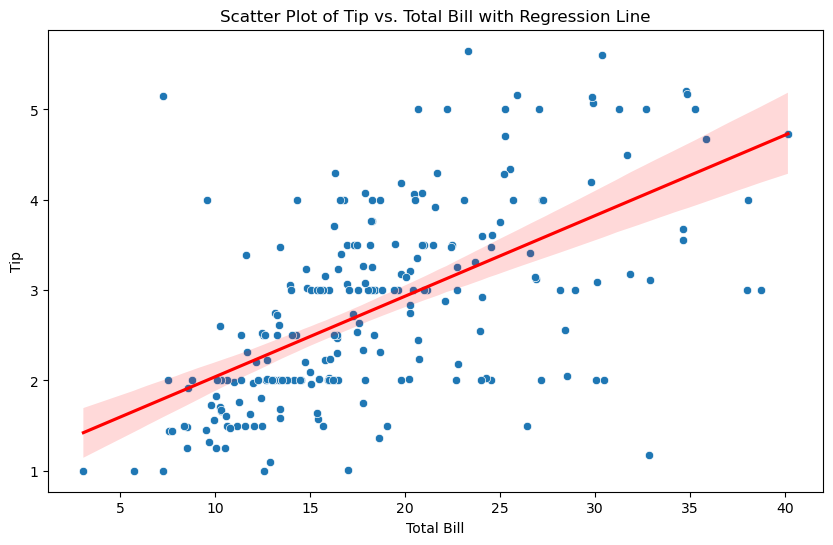

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_bill", y="tip", data=data)
sns.regplot(x="total_bill", y="tip", data=data, scatter=False, color="red")
plt.title("Scatter Plot of Tip vs. Total Bill with Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()